In [27]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt

### Importujemy dane

In [28]:
delivery_data = pd.read_json('proper_data/deliveries.json')
products_data = pd.read_json('proper_data/products.json')
sessions_data = pd.read_json('proper_data/sessions.json')
users_data = pd.read_json('proper_data/users.json')

### Pierwszy wgląd

In [29]:
sessions_data

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,100001,2021-02-26 12:45:21,102.0,1277.0,VIEW_PRODUCT,0,NaN
1,100002,2021-03-03 11:39:28,102.0,1001.0,VIEW_PRODUCT,0,NaN
2,100002,2021-03-03 11:40:23,102.0,1001.0,BUY_PRODUCT,0,20001.0
3,100003,2021-02-23 12:58:04,102.0,1286.0,VIEW_PRODUCT,5,NaN
4,100003,2021-02-23 13:02:58,102.0,1291.0,VIEW_PRODUCT,5,NaN
...,...,...,...,...,...,...,...
34841,109669,2021-03-15 03:05:31,301.0,1051.0,VIEW_PRODUCT,0,NaN
34842,109669,2021-03-15 03:07:27,301.0,1054.0,VIEW_PRODUCT,0,NaN
34843,109669,2021-03-15 03:09:55,301.0,1056.0,VIEW_PRODUCT,0,NaN
34844,109669,2021-03-15 03:13:37,NaN,1050.0,VIEW_PRODUCT,0,NaN


In [30]:
products_data

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
...,...,...,...,...
314,1315,Jabra Talk,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,54.99
315,1316,Plantronics Voyager Legend,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,249.00
316,1317,Plantronics Savi W740,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,1303.96
317,1318,Plantronics Savi W710,Sprzęt RTV;Audio;Słuchawki,553.00


In [31]:
delivery_data

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2021-03-03T11:40:23,2021-03-06T11:44:19,516.0
1,20002,2021-02-23T13:36:43,2021-02-25T13:38:55,360.0
2,20003,2021-03-13T17:58:13,2021-03-17T18:00:19,620.0
3,20004,2021-03-08T05:11:22,2021-03-10T05:13:50,360.0
4,20005,2021-03-03T18:11:04,2021-03-07T18:11:59,620.0
...,...,...,...,...
4851,24852,2021-02-27T18:42:10,2021-03-03T18:45:04,620.0
4852,24853,2021-02-14T03:13:25,2021-02-17T03:17:01,516.0
4853,24854,2021-03-11T01:39:05,2021-03-15T01:42:30,516.0
4854,24855,2021-03-01T22:07:12,2021-03-03T22:10:17,620.0


In [32]:
users_data

,user_id,name,city,street
0,102,Dominik Fryś,Warszawa,ulica Jagiellońska 47/15
1,103,Tymon Michalczak,Gdynia,aleja Kraszewskiego 45/79
2,104,Kamil Żmija,Police,plac Lazurowa 60
3,105,Julianna Kurzac,Radom,pl. Truskawkowa 481
4,106,Dominik Turoń,Mielec,al. Piwna 146
...,...,...,...,...
195,297,Sandra Kołpak,Mielec,al. Górnicza 84/12
196,298,Kaja Działa,Gdynia,al. Mazurska 12/51
197,299,Jerzy Matynia,Konin,ul. Leszczynowa 50
198,300,Robert Wasil,Gdynia,ul. Miodowa 87


### Userzy rozłożeni po miastach

In [33]:
city_user_count = pd.DataFrame(users_data.groupby('city').count()['user_id'])
city_user_count['city'] = city_user_count.index

city_user_count = city_user_count.rename(columns={
    "user_id": "count_users"
})


city_user_count

,count_users,city
city,,
Gdynia,21,Gdynia
Konin,23,Konin
Kutno,27,Kutno
Mielec,31,Mielec
Police,17,Police
Radom,26,Radom
Szczecin,27,Szczecin
Warszawa,28,Warszawa


### Jak dużo sesji zakończyło się sukcesem?

In [34]:
sessions_data[sessions_data['event_type'] == "BUY_PRODUCT"]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
2,100002,2021-03-03 11:40:23,102.0,1001.0,BUY_PRODUCT,0,20001.0
13,100003,2021-02-23 13:36:43,102.0,1288.0,BUY_PRODUCT,5,20002.0
24,100005,2021-03-13 17:58:13,NaN,1293.0,BUY_PRODUCT,20,20003.0
28,100006,2021-03-08 05:11:22,102.0,1073.0,BUY_PRODUCT,20,20004.0
32,100009,2021-03-03 18:11:04,102.0,1035.0,BUY_PRODUCT,0,20005.0
...,...,...,...,...,...,...,...
34824,109663,2021-02-27 18:42:10,301.0,1283.0,BUY_PRODUCT,5,24852.0
34827,109664,2021-02-14 03:13:25,301.0,1277.0,BUY_PRODUCT,0,24853.0
34834,109666,2021-03-11 01:39:05,301.0,1047.0,BUY_PRODUCT,0,24854.0
34836,109667,2021-03-01 22:07:12,301.0,1319.0,BUY_PRODUCT,0,24855.0


### Ile sesji zakończyło się sukcesem per user?

In [35]:
successful_sessions = sessions_data[sessions_data['event_type'] == 'BUY_PRODUCT']

num_sessions = pd.DataFrame(
    sessions_data[sessions_data['event_type'] == 'BUY_PRODUCT']
    .groupby('user_id')
    .count()["purchase_id"]
)

num_sessions = num_sessions.rename(columns={
    "purchase_id": "num_buying_sessions"
})

num_sessions['user_id'] = num_sessions.index
num_sessions.reset_index(drop=True, inplace=True)

num_sessions
users_descr = pd.merge(num_sessions, users_data, on="user_id", how="outer")
users_descr['num_buying_sessions'].fillna(0, inplace=True)

users_descr

,num_buying_sessions,user_id,name,city,street
0,52.0,102.0,Dominik Fryś,Warszawa,ulica Jagiellońska 47/15
1,11.0,103.0,Tymon Michalczak,Gdynia,aleja Kraszewskiego 45/79
2,16.0,104.0,Kamil Żmija,Police,plac Lazurowa 60
3,12.0,105.0,Julianna Kurzac,Radom,pl. Truskawkowa 481
4,27.0,106.0,Dominik Turoń,Mielec,al. Piwna 146
...,...,...,...,...,...
195,33.0,300.0,Robert Wasil,Gdynia,ul. Miodowa 87
196,49.0,301.0,Kacper Freitag,Police,ulica Lisia 82/76
197,0.0,237.0,Antoni Staśko,Kutno,aleja Lelewela 92/58
198,0.0,256.0,Maks Buczko,Mielec,plac Kosynierów 923


### Błędne dane tu

In [36]:
successful_sessions[successful_sessions['product_id'].isnull()]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
222,100066,2021-03-13 04:55:39,102.0,NaN,BUY_PRODUCT,15,20042.0
394,100117,2020-05-05 04:35:36,104.0,NaN,BUY_PRODUCT,5,20065.0
605,100179,2021-03-03 23:13:07,105.0,NaN,BUY_PRODUCT,20,20088.0
760,100220,2021-03-01 05:01:26,NaN,NaN,BUY_PRODUCT,0,20102.0
801,100230,2021-03-10 00:47:17,106.0,NaN,BUY_PRODUCT,10,20107.0
...,...,...,...,...,...,...,...
33682,109335,2020-04-03 23:57:52,297.0,NaN,BUY_PRODUCT,0,24688.0
33961,109412,2020-03-30 13:53:01,298.0,NaN,BUY_PRODUCT,0,24727.0
34181,109473,2021-01-15 08:40:30,299.0,NaN,BUY_PRODUCT,5,24756.0
34329,109521,2021-02-27 13:55:06,300.0,NaN,BUY_PRODUCT,0,24782.0


### Ile sumarycznie wydał każdy user uwzględniając zniżki?

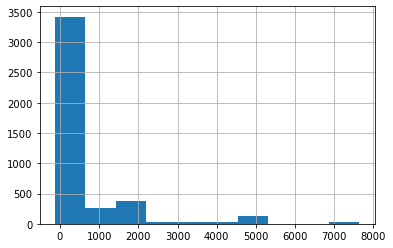

In [37]:
# little preprocessing

boughts_with_prices = pd.merge(successful_sessions, products_data, on="product_id", how="inner")
boughts_with_prices = boughts_with_prices.rename(columns={"price": "total_price"})

boughts_with_prices['sum_after_discount'] = boughts_with_prices['total_price'] * (1 - boughts_with_prices['offered_discount'] / 100)
boughts_with_prices

boughts_with_prices[boughts_with_prices['total_price'] == boughts_with_prices['total_price'].max()].product_name.value_counts()


# dropping IPAD MINI Outliers

boughts_with_prices = boughts_with_prices.drop(
    boughts_with_prices[boughts_with_prices.total_price > 1000000].index
)

boughts_with_prices.total_price.hist()

spendings_per_user = boughts_with_prices.groupby("user_id").sum()['sum_after_discount']

spendings_per_user = pd.DataFrame(spendings_per_user)
spendings_per_user['user_id'] = spendings_per_user.index
spendings_per_user.reset_index(drop=True, inplace=True)

In [38]:
print(spendings_per_user)
users_descr

users_descr1 = pd.merge(users_descr, spendings_per_user, on="user_id", how="outer")
users_descr1
users_descr1['sum_after_discount'].fillna(0, inplace=True)

     sum_after_discount  user_id
0            24240.5110    102.0
1             2635.6820    103.0
2            12276.2215    104.0
3             5106.6495    105.0
4            19254.1225    106.0
..                  ...      ...
192          17980.7395    297.0
193          18535.2705    298.0
194           8846.9315    299.0
195          20850.3460    300.0
196          21346.1905    301.0

[197 rows x 2 columns]


In [60]:
users_descr1['avg_spending'] = users_descr1['sum_after_discount'] / users_descr1['num_buying_sessions']
users_descr1['avg_spending'].fillna(0, inplace=True)
# users_descr1.sum_after_discount.hist()
# users_descr1.avg_spending.hist()

users_descr1.sum_after_discount.describe()

count      200.000000
mean     12584.666035
std       8834.821860
min          0.000000
25%       5132.469500
50%      11645.471250
75%      19250.518750
max      44118.204500
Name: sum_after_discount, dtype: float64

### TOP 25 buyers by sum

In [63]:
users_descr1.sort_values('sum_after_discount', ascending=False).head(10)

,num_buying_sessions,user_id,name,city,street,sum_after_discount,avg_spending
150,47.0,253.0,Urszula Cyman,Radom,ul. Kilińskiego 32,44118.2045,938.685202
92,49.0,194.0,Dagmara Paździora,Szczecin,al. Słowianska 96,37832.1860,772.085429
81,38.0,183.0,Jan Chomiuk,Warszawa,aleja Wiśniowa 96/74,37749.8570,993.417289
18,34.0,120.0,Adam Wielgo,Konin,ul. Chabrowa 634,36874.5480,1084.545529
146,46.0,249.0,Łukasz Barej,Radom,al. Mazowiecka 586,33220.5645,722.186185
36,45.0,138.0,Ada Rajtar,Szczecin,al. Promienna 69/40,31504.5060,700.100133
91,41.0,193.0,Dagmara Samiec,Kutno,ul. Mała 688,31474.0265,767.659183
164,46.0,268.0,Albert Świt,Radom,pl. Wesoła 63,30497.1890,662.982370
154,25.0,258.0,Marcel Kolka,Konin,al. Maczka 775,29035.9915,1161.439660
43,35.0,145.0,Igor Karmelita,Radom,pl. Piastowska 10,28266.2630,807.607514


### TOP 25 customers by bought products

In [66]:
users_descr1.sort_values("num_buying_sessions", ascending=False).head(10)

,num_buying_sessions,user_id,name,city,street,sum_after_discount,avg_spending
88,54.0,190.0,Bruno Szczepaniec,Szczecin,plac Rolna 84/79,19388.2330,359.041352
0,52.0,102.0,Dominik Fryś,Warszawa,ulica Jagiellońska 47/15,24240.5110,466.163673
177,52.0,281.0,Eliza Fechner,Szczecin,ul. Parkowa 71/53,27823.4200,535.065769
125,51.0,227.0,Arkadiusz Puto,Kutno,plac Sadowa 08,17999.7495,352.936265
132,50.0,234.0,Bartek Myrcik,Konin,pl. Krótka 57,24194.6905,483.893810
182,49.0,286.0,Rafał Hasiak,Mielec,pl. Pogodna 00,16630.5560,339.399102
192,49.0,297.0,Sandra Kołpak,Mielec,al. Górnicza 84/12,17980.7395,366.953867
92,49.0,194.0,Dagmara Paździora,Szczecin,al. Słowianska 96,37832.1860,772.085429
196,49.0,301.0,Kacper Freitag,Police,ulica Lisia 82/76,21346.1905,435.636541
150,47.0,253.0,Urszula Cyman,Radom,ul. Kilińskiego 32,44118.2045,938.685202


### TOP 25 buyers by avg spending

In [67]:
users_descr1.sort_values('avg_spending', ascending=False).head(10)

,num_buying_sessions,user_id,name,city,street,sum_after_discount,avg_spending
49,1.0,151.0,Stanisław Pasieczna,Warszawa,ul. Batalionów Chłopskich 91,4368.1000,4368.100000
140,3.0,243.0,Jerzy Satora,Gdynia,aleja Rataja 971,9656.7910,3218.930333
170,2.0,274.0,Jeremi Skała,Warszawa,ulica Konwaliowa 28,5126.0000,2563.000000
175,5.0,279.0,Franciszek Warzybok,Radom,al. Wiklinowa 71,10090.9215,2018.184300
83,4.0,185.0,Rafał Natanek,Warszawa,ul. Długosza 63,7983.1810,1995.795250
138,4.0,241.0,Ada Stein,Warszawa,pl. Konopnickiej 04,6668.7700,1667.192500
174,3.0,278.0,Blanka Leśna,Police,plac Słonecznikowa 44/90,4324.9700,1441.656667
47,19.0,149.0,Konstanty Łobacz,Mielec,ul. Prusa 19,24042.5065,1265.395079
167,9.0,271.0,Marcin Szmalec,Warszawa,plac Diamentowa 73/33,11122.4400,1235.826667
131,12.0,233.0,Sonia Miśkowiec,Warszawa,pl. Składowa 73,14057.7500,1171.479167


### The distribution of the total sum spend

80 - percentile:  20188.3269
40


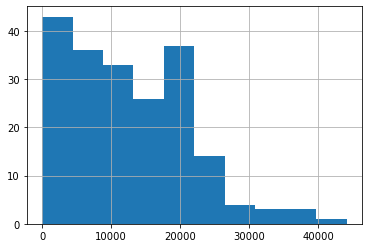

In [94]:
users_descr1.sum_after_discount.hist()
quantile = 0.8
threshold = users_descr1.sum_after_discount.quantile(quantile)
print(f"{int(quantile * 100)} - percentile: ", users_descr1.sum_after_discount.quantile(quantile))

best_users_sum = users_descr1[users_descr1.sum_after_discount > threshold]
n_users = len(best_users)
print(n_users)

### The distribution of number of bought products

80 - percentile:  20188.3269
40


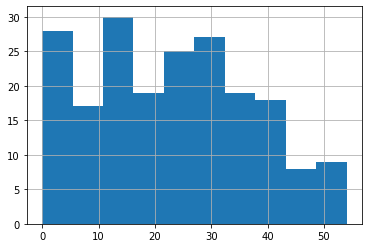

In [95]:
users_descr1.num_buying_sessions.hist()
quantile = 0.8

threshold = users_descr1.sum_after_discount.quantile(quantile)

print(f"{int(quantile * 100)} - percentile: ", users_descr1.sum_after_discount.quantile(quantile))

best_users_count = users_descr1[users_descr1.sum_after_discount > threshold]
n_users = len(best_users)
print(n_users)

### Liczba dni od ostatniego zakupu

In [42]:
timestamps = sessions_data[['user_id','timestamp', 'event_type']]
buy_timestamps = timestamps[timestamps['event_type'] == "BUY_PRODUCT"][['user_id', 'timestamp']]

last_purchase = buy_timestamps.groupby('user_id').max()
last_purchase.columns = ['last_purchase']
last_purchase['now'] = pd.Timestamp.now()
days_without_purchase = (last_purchase.now - last_purchase.last_purchase).dt.days
days_without_purchase = pd.DataFrame(days_without_purchase)
days_without_purchase.columns = ['days_from_last_purchase']
days_without_purchase

,days_from_last_purchase
user_id,
102.0,31
103.0,37
104.0,74
105.0,36
106.0,31
...,...
297.0,31
298.0,49
299.0,38


### Średni odstęp między zakupami

,frequency_purchases_first_last,frequency_purchases_first_now,frequency_purchases_first_now_days,frequency_purchases_first_last_days
user_id,,,,
102.0,0 days 13:39:16.903846,1 days 04:06:08.721157,1,0
103.0,6 days 02:25:47.545454,9 days 12:28:14.590925,9,6
104.0,18 days 06:42:21.687500,22 days 22:59:27.031261,22,18
105.0,2 days 00:48:20.666666,5 days 02:01:04.125014,5,2
106.0,1 days 01:35:49.407407,2 days 05:41:14.425932,2,1
...,...,...,...,...
297.0,7 days 09:48:36.612244,8 days 01:09:34.010207,8,7
298.0,8 days 20:10:08.692307,10 days 02:53:59.346158,10,8
299.0,3 days 12:50:05.478260,5 days 05:23:54.804355,5,3


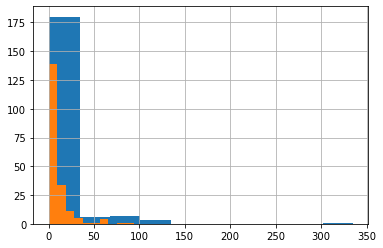

In [43]:
last_purchase['first_purchase'] = buy_timestamps.groupby('user_id').min()
time_of_purchases = pd.DataFrame((last_purchase.last_purchase - last_purchase.first_purchase))
time_of_purchases.columns = ['time_beetwen_first_and_last_purchase']
time_of_purchases['time_beetwen_first_purchase_and_now'] = last_purchase.now - last_purchase.first_purchase
time_of_purchases['number_of_purchase'] = buy_timestamps.groupby('user_id').count()
frequency_of_purchases = pd.DataFrame(time_of_purchases['time_beetwen_first_and_last_purchase'] / time_of_purchases['number_of_purchase'])
frequency_of_purchases.columns = ['frequency_purchases_first_last']
frequency_of_purchases['frequency_purchases_first_now'] = time_of_purchases['time_beetwen_first_purchase_and_now'] / time_of_purchases['number_of_purchase']
frequency_of_purchases['frequency_purchases_first_now_days'] = frequency_of_purchases['frequency_purchases_first_now'].dt.days
frequency_of_purchases['frequency_purchases_first_last_days'] = frequency_of_purchases['frequency_purchases_first_last'].dt.days
frequency_of_purchases.frequency_purchases_first_now_days.hist()
frequency_of_purchases.frequency_purchases_first_last_days.hist()
frequency_of_purchases

### Kupowalność produktów

,number_of_purchases
product_id,
1001.0,256
1002.0,43
1003.0,33
1004.0,32
1005.0,40
...,...
1315.0,78
1316.0,75
1317.0,86


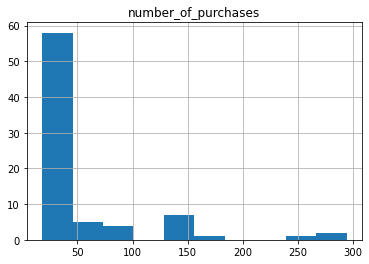

In [44]:
sessions_data_without_NaN = sessions_data.dropna(subset=['user_id', 'timestamp', 'product_id'])
sessions_data_without_NaN = sessions_data_without_NaN[sessions_data_without_NaN.event_type == "BUY_PRODUCT"]
sessions_data_without_NaN = sessions_data_without_NaN[['session_id', 'product_id']]

product_purchases = sessions_data_without_NaN.groupby('product_id').count()
product_purchases.columns = ['number_of_purchases']
product_purchases.hist()
product_purchases

### Wyadne pieniądze per sesja

In [45]:
all_sessions_number = len(sessions_data)
sum_of_spent_money = sum(boughts_with_prices['sum_after_discount'])
many_per_session = sum_of_spent_money / all_sessions_number
many_per_session

sessions_number_per_user = sessions_data[['user_id', 'session_id']].groupby('user_id').count()
sessions_number_per_user.columns = ['number_of_sessions']
spendings_per_user = pd.DataFrame(boughts_with_prices.groupby("user_id").sum()['sum_after_discount'])
many_per_session_per_user = spendings_per_user.sum_after_discount /  sessions_number_per_user.number_of_sessions
many_per_session_per_user

user_id
102.0    79.217356
103.0    40.548954
104.0    78.693728
105.0    33.596378
106.0    90.394941
           ...    
297.0    58.953244
298.0    67.156777
299.0    57.823082
300.0    91.049546
301.0    64.882038
Length: 200, dtype: float64

### Liczba zakupionych towarów / liczba sesji

In [46]:
user_purchases_number = successful_sessions[['session_id', 'user_id']].groupby('user_id').count()
user_purchases_number.columns = ['number_of_purchases']

user_purchases_per_session = pd.DataFrame(user_purchases_number.number_of_purchases / sessions_number_per_user.number_of_sessions)
user_purchases_per_session.columns = ['purchases_per_session']
user_purchases_per_session['number_of_purchases'] = user_purchases_number.number_of_purchases
user_purchases_per_session['number_of_sessions'] = sessions_number_per_user.number_of_sessions

user_purchases_per_session

,purchases_per_session,number_of_purchases,number_of_sessions
user_id,,,
102.0,0.169935,52.0,306
103.0,0.169231,11.0,65
104.0,0.102564,16.0,156
105.0,0.078947,12.0,152
106.0,0.126761,27.0,213
...,...,...,...
297.0,0.160656,49.0,305
298.0,0.141304,39.0,276
299.0,0.150327,23.0,153


### Jak długo trwały dostawy do użytkownika

In [47]:
sessions_with_delivery = pd.merge(sessions_data, delivery_data, on="purchase_id", how="inner")
sessions_with_delivery = sessions_with_delivery.dropna(subset=['user_id', 'purchase_timestamp', 'delivery_timestamp'])
delivery_time = sessions_with_delivery[['user_id', 'purchase_timestamp', 'delivery_timestamp']]

# to rzuca warrning

delivery_time
# delivery_time['purchase_unix_timestamp'] = pd.to_datetime(delivery_time['delivery_timestamp'])

# delivery_time['transport_time'] = pd.DataFrame((pd.to_datetime(delivery_time['delivery_timestamp']) - pd.to_datetime(delivery_time['purchase_timestamp'])))

# delivery_time[['user_id', 'transport_time']].groupby('user_id').mean(numeric_only=False)

,user_id,purchase_timestamp,delivery_timestamp
0,102.0,2021-03-03T11:40:23,2021-03-06T11:44:19
1,102.0,2021-02-23T13:36:43,2021-02-25T13:38:55
3,102.0,2021-03-08T05:11:22,2021-03-10T05:13:50
4,102.0,2021-03-03T18:11:04,2021-03-07T18:11:59
5,102.0,2021-02-18T07:37:35,2021-02-22T07:41:54
...,...,...,...
4851,301.0,2021-02-27T18:42:10,2021-03-03T18:45:04
4852,301.0,2021-02-14T03:13:25,2021-02-17T03:17:01
4853,301.0,2021-03-11T01:39:05,2021-03-15T01:42:30
4854,301.0,2021-03-01T22:07:12,2021-03-03T22:10:17


### Ile razy ktoś oglądał produkt przed zakupem

In [48]:
successful_sessions

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
2,100002,2021-03-03 11:40:23,102.0,1001.0,BUY_PRODUCT,0,20001.0
13,100003,2021-02-23 13:36:43,102.0,1288.0,BUY_PRODUCT,5,20002.0
24,100005,2021-03-13 17:58:13,NaN,1293.0,BUY_PRODUCT,20,20003.0
28,100006,2021-03-08 05:11:22,102.0,1073.0,BUY_PRODUCT,20,20004.0
32,100009,2021-03-03 18:11:04,102.0,1035.0,BUY_PRODUCT,0,20005.0
...,...,...,...,...,...,...,...
34824,109663,2021-02-27 18:42:10,301.0,1283.0,BUY_PRODUCT,5,24852.0
34827,109664,2021-02-14 03:13:25,301.0,1277.0,BUY_PRODUCT,0,24853.0
34834,109666,2021-03-11 01:39:05,301.0,1047.0,BUY_PRODUCT,0,24854.0
34836,109667,2021-03-01 22:07:12,301.0,1319.0,BUY_PRODUCT,0,24855.0


In [49]:
successful_sessions[(successful_sessions.session_id == 100002)]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
2,100002,2021-03-03 11:40:23,102.0,1001.0,BUY_PRODUCT,0,20001.0


In [50]:
tmp = successful_sessions[['session_id', 'user_id', 'product_id', 'timestamp']]
tmp

,session_id,user_id,product_id,timestamp
2,100002,102.0,1001.0,2021-03-03 11:40:23
13,100003,102.0,1288.0,2021-02-23 13:36:43
24,100005,NaN,1293.0,2021-03-13 17:58:13
28,100006,102.0,1073.0,2021-03-08 05:11:22
32,100009,102.0,1035.0,2021-03-03 18:11:04
...,...,...,...,...
34824,109663,301.0,1283.0,2021-02-27 18:42:10
34827,109664,301.0,1277.0,2021-02-14 03:13:25
34834,109666,301.0,1047.0,2021-03-11 01:39:05
34836,109667,301.0,1319.0,2021-03-01 22:07:12


In [52]:
# looking_before_purchase = pd.read_json('proper_data/looking_before_purchase.json')
# looking_before_purchase.sessions_before_purchase

ValueError: Expected object or value

### Successful deliveries

In [99]:
buyings_deliveries = pd.merge(successful_sessions, delivery_data, on="purchase_id", how="inner")
buyings_deliveries

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,100002,2021-03-03 11:40:23,102.0,1001.0,BUY_PRODUCT,0,20001.0,2021-03-03T11:40:23,2021-03-06T11:44:19,516.0
1,100003,2021-02-23 13:36:43,102.0,1288.0,BUY_PRODUCT,5,20002.0,2021-02-23T13:36:43,2021-02-25T13:38:55,360.0
2,100005,2021-03-13 17:58:13,NaN,1293.0,BUY_PRODUCT,20,20003.0,2021-03-13T17:58:13,2021-03-17T18:00:19,620.0
3,100006,2021-03-08 05:11:22,102.0,1073.0,BUY_PRODUCT,20,20004.0,2021-03-08T05:11:22,2021-03-10T05:13:50,360.0
4,100009,2021-03-03 18:11:04,102.0,1035.0,BUY_PRODUCT,0,20005.0,2021-03-03T18:11:04,2021-03-07T18:11:59,620.0
...,...,...,...,...,...,...,...,...,...,...
4851,109663,2021-02-27 18:42:10,301.0,1283.0,BUY_PRODUCT,5,24852.0,2021-02-27T18:42:10,2021-03-03T18:45:04,620.0
4852,109664,2021-02-14 03:13:25,301.0,1277.0,BUY_PRODUCT,0,24853.0,2021-02-14T03:13:25,2021-02-17T03:17:01,516.0
4853,109666,2021-03-11 01:39:05,301.0,1047.0,BUY_PRODUCT,0,24854.0,2021-03-11T01:39:05,2021-03-15T01:42:30,516.0
4854,109667,2021-03-01 22:07:12,301.0,1319.0,BUY_PRODUCT,0,24855.0,2021-03-01T22:07:12,2021-03-03T22:10:17,620.0


In [103]:
buyings_deliveries['is_successful'] = ["delivered" if elem else "dropped" for elem in buyings_deliveries['delivery_timestamp']]
buyings_deliveries

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,is_successful
0,100002,2021-03-03 11:40:23,102.0,1001.0,BUY_PRODUCT,0,20001.0,2021-03-03T11:40:23,2021-03-06T11:44:19,516.0,delivered
1,100003,2021-02-23 13:36:43,102.0,1288.0,BUY_PRODUCT,5,20002.0,2021-02-23T13:36:43,2021-02-25T13:38:55,360.0,delivered
2,100005,2021-03-13 17:58:13,NaN,1293.0,BUY_PRODUCT,20,20003.0,2021-03-13T17:58:13,2021-03-17T18:00:19,620.0,delivered
3,100006,2021-03-08 05:11:22,102.0,1073.0,BUY_PRODUCT,20,20004.0,2021-03-08T05:11:22,2021-03-10T05:13:50,360.0,delivered
4,100009,2021-03-03 18:11:04,102.0,1035.0,BUY_PRODUCT,0,20005.0,2021-03-03T18:11:04,2021-03-07T18:11:59,620.0,delivered
...,...,...,...,...,...,...,...,...,...,...,...
4851,109663,2021-02-27 18:42:10,301.0,1283.0,BUY_PRODUCT,5,24852.0,2021-02-27T18:42:10,2021-03-03T18:45:04,620.0,delivered
4852,109664,2021-02-14 03:13:25,301.0,1277.0,BUY_PRODUCT,0,24853.0,2021-02-14T03:13:25,2021-02-17T03:17:01,516.0,delivered
4853,109666,2021-03-11 01:39:05,301.0,1047.0,BUY_PRODUCT,0,24854.0,2021-03-11T01:39:05,2021-03-15T01:42:30,516.0,delivered
4854,109667,2021-03-01 22:07:12,301.0,1319.0,BUY_PRODUCT,0,24855.0,2021-03-01T22:07:12,2021-03-03T22:10:17,620.0,delivered


In [105]:
user_buyings = buyings_deliveries.pivot_table(
    index="user_id",
    columns="is_successful",
    values="purchase_id",
    aggfunc="count",
    fill_value=0
).reset_index()

user_buyings

is_successful,user_id,delivered,dropped
0,102.0,48,4
1,103.0,10,1
2,104.0,15,1
3,105.0,12,0
4,106.0,27,0
...,...,...,...
192,297.0,46,3
193,298.0,36,3
194,299.0,17,6
195,300.0,32,1


In [106]:
users_descr1 = pd.merge(users_descr1, user_buyings, on="user_id", how='inner')
users_descr1

,num_buying_sessions,user_id,name,city,street,sum_after_discount,avg_spending,delivered,dropped
0,52.0,102.0,Dominik Fryś,Warszawa,ulica Jagiellońska 47/15,24240.5110,466.163673,48,4
1,11.0,103.0,Tymon Michalczak,Gdynia,aleja Kraszewskiego 45/79,2635.6820,239.607455,10,1
2,16.0,104.0,Kamil Żmija,Police,plac Lazurowa 60,12276.2215,767.263844,15,1
3,12.0,105.0,Julianna Kurzac,Radom,pl. Truskawkowa 481,5106.6495,425.554125,12,0
4,27.0,106.0,Dominik Turoń,Mielec,al. Piwna 146,19254.1225,713.115648,27,0
...,...,...,...,...,...,...,...,...,...
192,49.0,297.0,Sandra Kołpak,Mielec,al. Górnicza 84/12,17980.7395,366.953867,46,3
193,39.0,298.0,Kaja Działa,Gdynia,al. Mazurska 12/51,18535.2705,475.263346,36,3
194,23.0,299.0,Jerzy Matynia,Konin,ul. Leszczynowa 50,8846.9315,384.649196,17,6
195,33.0,300.0,Robert Wasil,Gdynia,ul. Miodowa 87,20850.3460,631.828667,32,1
